### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy
import random

warnings.filterwarnings('ignore')

#### Read Data

In [7]:
data =pd.read_csv('2013_2018_data.csv', index_col=0)

#### Dimensions of Data

In [8]:
data.shape

(505, 3)

#### Peak at the Data

In [9]:
data.head()

,Name,avg_yearly_returns,yearly_variance
0,A,0.096396,0.063768
1,AAL,0.301402,0.256976
2,AAP,0.099695,0.102084
3,AAPL,0.174460,0.047989
4,ABBV,0.232597,0.055567


In [10]:
data.tail()

,Name,avg_yearly_returns,yearly_variance
500,XYL,0.189168,0.031551
501,YUM,0.049243,0.023073
502,ZBH,0.090899,0.019280
503,ZION,0.161756,0.064176
504,ZTS,0.155466,0.020696


### Data Pre_Processing

#### Attributes in Data

In [11]:
data.columns

Index(['Name', 'avg_yearly_returns', 'yearly_variance'], dtype='object')

#### Data types of Attributes

In [12]:
data.dtypes

Name                   object
avg_yearly_returns    float64
yearly_variance       float64
dtype: object

#### Check Null Values

In [13]:
data.isnull().sum()

Name                  0
avg_yearly_returns    0
yearly_variance       6
dtype: int64

We have 6 null Values we have to remove them.

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Name                  0
avg_yearly_returns    0
yearly_variance       0
dtype: int64

#### Duplicate records

In [16]:
data.duplicated().sum()

0

#### Describe the Data

In [17]:
data.describe()

,avg_yearly_returns,yearly_variance
count,499.000000,499.000000
mean,0.117239,0.063590
std,0.107540,0.100835
min,-0.287048,0.002125
25%,0.055920,0.021566
50%,0.108931,0.039408
75%,0.165648,0.070944
max,0.753270,1.611375


#### correlation

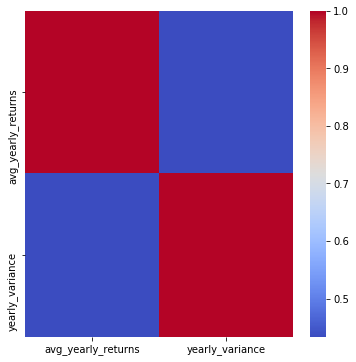

In [18]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),cmap='coolwarm')

Both attributes are not correlated.

## K Mean Clustring

#### Euclidean Distance:

In [19]:
# I have coded this part myself
def euclidean_distance_numpy(object1, object2):
    """!
    Calculate Euclidean distance between two objects using numpy.
    Arguments:
    
    1. object1 (array_like): The first array_like object.
    2. object2 (array_like): The second array_like object.
    
    Return:
    
    1. (double) Euclidean distance between two objects.
    """
    return numpy.sum(numpy.sqrt(numpy.square(object1 - object2)), axis=1).T

### Initialize centers

K-Means++ is an algorithm for choosing the initial centers for algorithms like K-Means or X-Means.
K-Means++ algorithm guarantees an approximation ratio O(log k). Clustering results are depends on initial centers in case of K-Means algorithm and even in case of X-Means. This method is used to find out optimal initial centers.

Algorithm can be divided into three steps.
    1. The first center is chosen from input data randomly with  uniform distribution at the first step.
    2. probability to being center is calculated for each point. Using these probabilities next center
    is chosen.
    3. The last step is repeated until required amount of centers is initialized.

In [20]:
class kmeans_plusplus:
    
    """
        This class of code is taken from:
       https://github.com/annoviko/pyclustering/blob/78338b698ce8c3d318be7326a30aedf1a4db216e/pyclustering/cluster/center_initializer.py#L104
    """
    
    """
    This extra functionality we are not going to use it that why we will remove it.
    
    
    ## Constant denotes that only points with highest probabilities should be considered as centers.
    FARTHEST_CENTER_CANDIDATE = "farthest"
    """
    


    def __init__(self, data, amount_centers, amount_candidates=None):
        
        """!
        Creates K-Means++ center initializer instance.
        
        Arguments:
        
        1. data (array_like): List of points where each point is represented by list of coordinates.
        2. amount_centers (uint): Amount of centers that should be initialized.
        3. amount_candidates (uint): Amount of candidates that is considered as a center.
        """
      
        #initializing all values
        self.__data = numpy.array(data)
        self.__amount = amount_centers
        self.__free_indexes = set(range(len(self.__data))) # this is generalization of code. Initialize free_indexes variable with length of total data. 
        # for example length of data is 5 then our free_indexes set looks like this {0,1,2,3,4} and theses are indexes of our data.
        # here we are using set instead of list because set not allowed repetition of values. for free_indexes we don't want to repeat any value.
            
        #if amount of candidates is not given
        if amount_candidates is None:
            self.__candidates = 3
            if self.__candidates > len(self.__data): # len() function for getting length of data
                self.__candidates = len(self.__data) # len() function
        else:
            self.__candidates = amount_candidates
        # function call for checking parameters
        self.__check_parameters()

        random.seed(30)
        
    def __check_parameters(self):
        
        """!
        Checks input parameters of the algorithm and if something wrong then corresponding exception is thrown
        """
        #if given number of centers is less then equal to zero or gratter then total lenth of data then error msg will be show.
        if (self.__amount <= 0) or (self.__amount > len(self.__data)): # Here we are using len() function of checking length of data which is generalization
            raise ValueError("Amount of cluster centers '" + str(self.__amount) + "' should be at least 1 and "
                             "should be less or equal to amount of points in data.")
        """
        we will remove this line of code because we earlier decide we are not going to use FARTHEST_CENTER_CANDIDATE in
        our problem.
        
        if self.__candidates != kmeans_plusplus.FARTHEST_CENTER_CANDIDATE:
        """
        
        #if Amount of candidates that is considered as a center less then equal to zero or gratter then total lenth of data then error msg will be show.
        if (self.__candidates <= 0) or (self.__candidates > len(self.__data)): # we are using length function for getting length of data
            raise ValueError("Amount of center candidates '" + str(self.__candidates) + "' should be at least 1 "
                                 "and should be less or equal to amount of points in data.")
        
        # if data is empty it will throgh error
        if len(self.__data) == 0:
            raise ValueError("Data is empty.")


    def initialize(self, **kwargs):
        
        # defination **kwargs:   **kwargs is mostly used in function definitions. **kwargs allow you to pass a variable number
        # of arguments to a function. What variable means here is that you do not know beforehand how many arguments 
        #can be passed to your function by the user so in this case you use these this keywords.
        
        """!
        Calculates initial centers using K-Means++ method.
        
        
        Arguments:
        
        1. **kwargs:  In our case we accepting one argument from user which is Arbitrary keyword arguments (available arguments: 'return_index')
        
        detail : - return_index (bool): If True then returns indexes of points from input data instead of value.
        
        Return:
        
        1. (list) List of initialized initial centers.
        """
   
        # In this code we are doing two things. geting value of return_index from **kwargs if user type any value 
        #else if user did not give any arguments then return_index value will be false
        return_index = kwargs.get('return_index', False) 
        
        
        #Get first Center by calling function which will be use for finding other centers
        index_point = self.__get_initial_center(True)
        centers = [index_point]
        # remove the index from set which we select for first center so it will not select again. Now we want to slect remaing centers 
        # with the help of first center by finding probabilities.
        self.__free_indexes.remove(index_point)

        # For each next center we want to find.
        for _ in range(1, self.__amount):
            index_point = self.__get_next_center(centers)
            centers.append(index_point) # append index of center in list
            # remove the index from set which we select so it will not select again
            self.__free_indexes.remove(index_point)
        
        # if return_index is false then we will perform this
        if not return_index:
            # list comprehension for getting center values with help of center index
            centers = [self.__data[index] for index in centers]
 
        return centers
    
    

    def __calculate_shortest_distances(self, data, centers):
        
        """!
        Calculates distance from each data point to nearest center.
        
        Arguments:
        
        1. data (numpy.array): Array of points for that initialization is performed.
        2. centers (numpy.array): Array of indexes that represents centers.
        
        Return:
        
        1. (numpy.array) List of distances to closest center for each data point.
        
        """
      
        # intializing dataset_differences with zeros
        # this will create 2 demention arrary. first demention is equal to number centers and 2nd equal to length of data.
        # for example: we have 2 center and length of data is 5 then array=[[0,0,0,0,0],[0,0,0,0,0]]
        # in simple words we can say that dataset_differences is a array which contain multiple arrays and in precise 
        # number of arrays in dataset_differences is equal to number of centers and each array length is equal to lenght of data
        dataset_differences = numpy.zeros((len(centers), len(data)))
        
        for index_center in range(len(centers)): # repeat for every center
            
            center = data[centers[index_center]] # getting value of center
            # calculating distance b/w data and centers. and place difference array on same index of center  for which we calculating 
            # difference
            # for example we get first index_center and  from this index we get the center value and we calculate difference
            # with data and it will return array of difference. and now we will store it in dataset_differences we define with equal number of
            #centers. and place it in first index. and this will repeat for every center.
            dataset_differences[index_center] = euclidean_distance_numpy(data,center)

        with warnings.catch_warnings():
            #if we have any any null value then ignore it
            numpy.warnings.filterwarnings('ignore', r'All-NaN (slice|axis) encountered')
            # this will Return one minimum difference array from all the array we store in dataset_differences, ignoring any Null values.
            shortest_distances = numpy.nanmin(dataset_differences, axis=0)

        return shortest_distances


    def __get_next_center(self, centers):
        """!
        Calculates the next center for the data.
        Argument:
        
        1. centers (array_like): Current initialized centers represented by indexes.
        
        Return:
        
        1. (array_like) Next initialized center.
                
        """
     
        distances = self.__calculate_shortest_distances(self.__data, centers) # Calculate shortest distance with all given centers
        
        """
        We will remove this code because FARTHEST_CENTER_CANDIDATE in our problem.
        
        if self.__candidates == kmeans_plusplus.FARTHEST_CENTER_CANDIDATE:
            for index_point in centers:
                distances[index_point] = numpy.nan
            center_index = numpy.nanargmax(distances)
        else:
        
        """
        
        probabilities = self.__calculate_probabilities(distances) # get probabilities base on distances
        center_index = self.__get_probable_center(distances, probabilities) # get best center index base on probabilities and distances

        return center_index


    def __get_initial_center(self, return_index):
        
        """!
        Choose randomly first center.
        Argument:
        
        1. return_index (bool): If True then return center's index instead of point.
        
        Return:
        
        1.(array_like) First center.
                (uint) Index of first center.
        """
   
        index_center = random.randint(0, len(self.__data) - 1) # randomly select an index for first center uniformaly
    
        if return_index: # if true then return index of first center
            return index_center # return index of center

        return self.__data[index_center] # # if return_index is not true then return value of first center


    def __calculate_probabilities(self, distances):
      
        """!
        Calculates cumulative probabilities of being center of each point.
        
        Argument:
        
        1. distances (array_like): Distances from each point to closest center.
        
        Return:
        
        1.  (array_like) Cumulative probabilities of being center of each point.
        """

        total_distance = numpy.sum(distances) # sum all the distances
        
        #if total sum of distance is not equal to zero then Calculate prob. else retrun zero prob
        if total_distance != 0.0:
            probabilities = distances / total_distance
            return numpy.cumsum(probabilities) #calculating Cumulative probability with numpy function
        else:
            return numpy.zeros(len(distances))


    def __get_probable_center(self, distances, probabilities):
        
        """!
        Calculates the next probable center considering amount candidates.
        
        Arguments:
        
        1. distances (array_like): Distances from each point to closest center.
        2. probabilities (array_like): Cumulative probabilities of being center of each point.
        
        Return:
        
        1. (uint) Index point that is next initialized center.
        """
   
        index_best_candidate = 0
        # Using two for loops for calculating index_best_candidate (Best center point)
        for i in range(self.__candidates):
            candidate_probability = random.random() #setting probability randomly.
            index_candidate = -1

            for index_object in range(len(probabilities)): # run for each probabilities we find in calculate_probabilities.
                
                 # if candidate_probability is less then probabilities of any index then assign index_candidate equal to index_object
                # and break the loop
                if candidate_probability < probabilities[index_object]:
                    index_candidate = index_object
                    break

            if index_candidate == -1:
                 # handling error if index_candidate value remain -1 then what will we do. 
                #We use the next() function to manually iterate through all the items of an iterator
                index_best_candidate = next(iter(self.__free_indexes))
            elif distances[index_best_candidate] < distances[index_candidate]: # else we set our best candidate value for center
                index_best_candidate = index_candidate

        return index_best_candidate # return best index for next center

### Algorithm

K-Means clustering results depend on initial centers. So I used Algorithm K-Means++ used for initialization of initial centers.

In [21]:
# for loop counting
loopCounter = 0

In [22]:
"""
This part of code is taken from 
https://github.com/annoviko/pyclustering/blob/78338b698ce8c3d318be7326a30aedf1a4db216e/pyclustering/cluster/kmeans.py#L272

"""
class kmeans:
    """!
     Class implements K-Means clustering algorithm.
    
    """
    
    
    def __init__(self, data, initial_centers, tolerance=0.001, ccore=False, **kwargs):
        
        """!
        Constructor of clustering algorithm K-Means.
        
        Arguments:
        
        1. data (array_like): Input data that is presented as array of points (objects),
        each point should be represented by array_like data structure.
        2. initial_centers (array_like): Initial coordinates of centers of clusters that are represented by
            array_like data structure: [center1, center2, ...].
        3. tolerance (double): Stop condition: if maximum value of change of centers of clusters is
           less than tolerance then algorithm stops processing.
           
        4. **kwargs: Arbitrary keyword arguments (available arguments: 'observer', 'metric', 'itermax').
            
           Note: We will remove observer,metric. these arguments are library dependent so we will use only itermax.
        """
       
        self.__pointer_data = numpy.array(data)
        self.__clusters = []
        self.__centers = numpy.array(initial_centers)
        self.__tolerance = tolerance
        self.__total_wce = 0.0
        
        self.__itermax = kwargs.get('itermax', 100) # get itermax value if user give else use 100.

        """
        commenting this code because this is library dependent
       
        self.__observer = kwargs.get('observer', None)
        self.__metric = kwargs.get('metric', distance_metric(type_metric.EUCLIDEAN_SQUARE))

        if self.__metric.get_type() != type_metric.USER_DEFINED:
            self.__metric.enable_numpy_usage()
        else:
            self.__metric.disable_numpy_usage()
        
        self.__ccore = ccore and self.__metric.get_type() != type_metric.USER_DEFINED
        if self.__ccore is True:
            self.__ccore = ccore_library.workable()
            
         """
        # call function for verify arguments
        self.__verify_arguments()


    def process(self):
        
        """!
        Performs cluster analysis with K-Means algorithm.
        
        Return:
        
        1. K-Means instance.
       
        
        """
        
        if len(self.__pointer_data[0]) != len(self.__centers[0]):
            raise ValueError("Dimension of the input data and dimension of the initial cluster centers must be equal.")

        """
        # library dependent. process_by_ccore() will use c programming language for performing K mean clustring
        
         if self.__ccore is True:
            self.__process_by_ccore()
        else:
        """
       
        self.__process_by_python()

        return self
    

    #  remove this function this is library dependent
    """
    
    def __process_by_ccore(self):
        
        ccore_metric = metric_wrapper.create_instance(self.__metric)

        results = wrapper.kmeans(self.__pointer_data, self.__centers, self.__tolerance, self.__itermax, (self.__observer is not None), ccore_metric.get_pointer())
        self.__clusters = results[0]
        self.__centers = results[1]

        if self.__observer is not None:
            self.__observer.set_evolution_clusters(results[2])
            self.__observer.set_evolution_centers(results[3])

        self.__total_wce = results[4][0]
      """


    def __process_by_python(self):
        

        maximum_change = float('inf')
        iteration = 0
        
        # this part of code repeat until we converge (centers did not changes)
        
       
        """
        Remove this part of code this is this extra functionality and library dependent
        
        if self.__observer is not None:
            initial_clusters = self.__update_clusters()
            self.__observer.notify(initial_clusters, self.__centers.tolist())
        
        """
        
        """
        We set 2 conditions to stop our iterations.
        
        1. If our maximum change is less then our tolerance value
        2. And iterations equals to our given iterations
        
        The process will continue untill our both conditions are true.
        
        """
        
        while maximum_change > self.__tolerance and iteration < self.__itermax:
            
            self.__clusters = self.__update_clusters() # update clusters with the help of  centers.
            updated_centers = self.__update_centers()  # We are finding updated centers for finding maximum change and stop our iterations
            # changes should be calculated before we update our centers. We find maximum change b/w new and old centers. so updated_centers 
            # is temporary variable which hold updated centers and __center hold old centers.
            
            """
            remove this part of code this is library dependent
            
            if self.__observer is not None:
                self.__observer.notify(self.__clusters, updated_centers.tolist())
            """
            
            
            # we calculate changes b/w old and new centers for stoping iterations
            maximum_change = self.__calculate_changes(updated_centers)

            self.__centers = updated_centers    # now we can update our centers after change calculation and if maximum change 
            #is greater then tolerance then we again update our clusters base on these now centers. and after clusters are update
            # our centers may be update also. so we again calculate maximum change and then update the center on orignal place.
            iteration += 1

        self.__calculate_total_wce() # calling function for caculating total error between clusters.



    def predict(self, points):
        
        
        """!
        Calculates the closest cluster to each point.
        
        Argument:
        
        1. points (array_like): Points for which closest clusters are calculated.
        
        Return:
        
        1.  (list) List of closest clusters for each point. Each cluster is denoted by index. Return empty collection 
        if 'process()' method was not called.
        """
        

        nppoints = numpy.array(points)
        if len(self.__clusters) == 0:
        
            return []

        differences = numpy.zeros((len(nppoints), len(self.__centers)))
        for index_point in range(len(nppoints)):
            """
            if self.__metric.get_type() != type_metric.USER_DEFINED:
                differences[index_point] = self.__metric(nppoints[index_point], self.__centers)
            else:
             """
            differences[index_point] = [ euclidean_distance_numpy(nppoints[index_point], center) for center in self.__centers ]

        return numpy.argmin(differences, axis=1)


    def get_clusters(self):
        
        """!
        Returns:
        
        1. list of allocated clusters, each cluster contains indexes of objects in list of data.
        
        """
        return self.__clusters


    def get_centers(self):
        
        """!
        Returns:
        1. list of centers of allocated clusters.
        """

        if isinstance(self.__centers, list):
            return self.__centers
        
        return self.__centers.tolist()


    def get_total_wce(self):
        
        """!
        Returns:
        
        1. sum of metric errors that depends on metric that was used for clustering (SSE - Sum of Squared Errors).
    
        """

        return self.__total_wce

    # remove this function this is libraray dependent
    """
    def get_cluster_encoding(self):
        
        
        return type_encoding.CLUSTER_INDEX_LIST_SEPARATION
    """

    
    def __update_clusters(self):
        """!
        Calculate distance to each point from the each cluster. Nearest points are captured by 
        according clusters and as a result clusters are updated.
        
        Return:
        
        1. (list) Updated clusters as list of clusters. Each cluster contains indexes of objects from data.
        
        """
       
         #using list comprehension initialize empty clusters. if we have 3 clusters then it will initialize 3 empty lists in a list
        # it is called lists in a list.
        clusters = [[] for _ in range(len(self.__centers))]
        
        # calculating differences for every centers by calling function
        dataset_differences = self.__calculate_dataset_difference(len(clusters)) 
        
        # get the minimum indexes from all arrays.
        optimum_indexes = numpy.argmin(dataset_differences, axis=0)
        
        for index_point in range(len(optimum_indexes)):
            index_cluster = optimum_indexes[index_point]
            clusters[index_cluster].append(index_point) # we appending index_point in which clusters they blong.
        
        #list comprehension for removing cluster having zero element if any clusters have no value
        clusters = [cluster for cluster in clusters if len(cluster) > 0]

        return clusters
    
    
    def get_label(self):
        """!
        Returns:
        
        1. list of labels, which data belongs to which cluster.
        
        """
        # intializing with zeros
        labels = numpy.zeros(len(self.__pointer_data), dtype=int)
        #getting which poits belong to which cluster
        for cluster in range(len(self.__clusters)): 
            for index in self.__clusters[cluster]:
                labels[index] = cluster
                
        return labels
    

    def __update_centers(self):
        
        """!
        Calculate centers of clusters and also update centers according to new clusters.
        
        Return:
        
        1. (numpy.array) Updated centers.
        """
        
        dimension = self.__pointer_data.shape[1] # get the demension of data. generalize code.
        
        # intialize centers with zeros
        centers = numpy.zeros((len(self.__clusters), dimension))
        
        
        for index in range(len(self.__clusters)): # repeat for every cluster
            cluster_points = self.__pointer_data[self.__clusters[index], :] # salicing numpy array
            centers[index] = cluster_points.mean(axis=0) # calculating mean for every clusters which are our new centers

        return numpy.array(centers)


    def __calculate_total_wce(self):
        """!
        Calculate total within cluster errors .
        """
        
        # calculate difference by calling function
        dataset_differences = self.__calculate_dataset_difference(len(self.__clusters))
        
        # as we know dataset_differences contains multiple arrays. so will add all difference for getting total array
        self.__total_wce = 0
        
        # using 2 for loops for finding total error
        for index_cluster in range(len(self.__clusters)):
            for index_point in self.__clusters[index_cluster]:
                self.__total_wce += dataset_differences[index_cluster][index_point]


    def __calculate_dataset_difference(self, amount_clusters):
        
        """!
        Calculate distance from each point to each cluster center
        """
        # add this for counting loops
        global loopCounter
        
        #iniliazing dataset differences with zero
        dataset_differences = numpy.zeros((amount_clusters, len(self.__pointer_data)))
        for index_center in range(amount_clusters):
            """
            We must change this according to our problem this is library depentdent, we will use our 
            euclidean function for calculating difference.
             
            if self.__metric.get_type() != type_metric.USER_DEFINED:
                dataset_differences[index_center] = self.__metric(self.__pointer_data, self.__centers[index_center])
            else:
                dataset_differences[index_center] = [ self.__metric(point, self.__centers[index_center])
                                                      for point in self.__pointer_data ]
            """
            
            # calling euclidean_distance_numpy for calculating difference b.w two points
            dataset_differences[index_center] = euclidean_distance_numpy(self.__pointer_data, self.__centers[index_center])
            
            loopCounter += 1
       
        return dataset_differences


    def __calculate_changes(self, updated_centers):
        
        """!
        Calculates changes estimation between previous and current iteration using centers for that purpose.
        
        Argument:
        
        1. updated_centers (array_like): New cluster centers.
        
        Return:
        
        1. (float) Maximum changes between centers.
        """
        
        if len(self.__centers) != len(updated_centers):
            maximum_change = float('inf')

        else:
            """
            Change this code for our distance. we will use our distance formula
            changes = self.__metric(self.__centers, updated_centers)
            """
            changes = euclidean_distance_numpy(self.__centers, updated_centers)
            maximum_change = numpy.max(changes)

        return maximum_change


    def __verify_arguments(self):
        """!
         Verify input parameters for the algorithm and throw exception in case of incorrectness.
        """
        
        if len(self.__pointer_data) == 0:
            raise ValueError("Input data is empty (size: '%d')." % len(self.__pointer_data))

        if len(self.__centers) == 0:
            raise ValueError("Initial centers are empty (size: '%d')." % len(self.__pointer_data))

        if self.__tolerance < 0:
            raise ValueError("Tolerance (current value: '%d') should be greater or equal to 0." %
                             self.__tolerance)

        if self.__itermax < 0:
            raise ValueError("Maximum iterations (current value: '%d') should be greater or equal to 0." %
                             self.__tolerance)

## Modelling


#### Evaluation
Typically, two metrics are used to evaluate a K-means model.

1. Sum of square errors (SSE) within clusters

2. Silhouette score.

And we will use SSE for evaluation.

SSE within clusters is derived by summing up the squared distance between each data point and its closest centroid. The goal is to reduce the error value. The intuition behind this is that we would want the distance of each data point to be as close as possible to the centroid. If the error is small, it would mean that the data points in the same cluster are relatively similar. As the number of centroids (clusters) increase, the error value will decrease. As such we would need to rely on the next metric to ensure that we are not introducing too many centroids (clusters) in the model.

In [23]:
"""
This part of code is taken from the link you provided and from evaluation part for finding best number of clusters.
"""

def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE .
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    sample=X
    sse_within_cluster = {}
    
    for k in range(3, max_loop):
        initial_centers = kmeans_plusplus(sample, k).initialize() # creating k means plus plus object with data and
        # K values. then calling initialize() function for getting initial_centers 
        kmeans_instance = kmeans(sample, initial_centers) # creating k means  object with data and
        # initial_centers. This will set all variables value with the help of construter.
        kmeans_instance.process() # calling process function for performing all oprations for finding clusters.
        sse_within_cluster[k] = kmeans_instance.get_total_wce()

        
    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

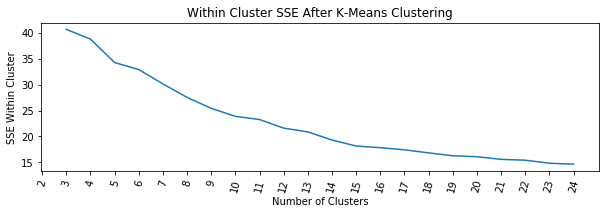

In [24]:
plot_cluster(data, max_loop=25)

From the graph, Within Cluster SSE After K-Means Clustering, we can see that as the number of clusters increase pass 12, the sum of square of errors within clusters plateaus off. But More cluster not give any meaning  So I would use 7 clusters in my K-Means model below.

In [25]:
"""
This code will train the model on number of cluster we find.
"""

def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    sample=X
    initial_centers = kmeans_plusplus(sample, clusters).initialize()
    kmeans_instance = kmeans(sample, initial_centers)
    kmeans_instance.process()
    df['cluster'] = kmeans_instance.get_label()
    sse_within_cluster = kmeans_instance.get_total_wce()    
    print("clustering performance")
    print("-----------------------------------")
    print("sse withing cluster: " + str(sse_within_cluster.round()))
    
    return df,kmeans_instance.get_label()

In [26]:
first_trial,labels = apply_cluster(data, clusters=7)

clustering performance
-----------------------------------
sse withing cluster: 30.0


#### Visulize Our Clusters

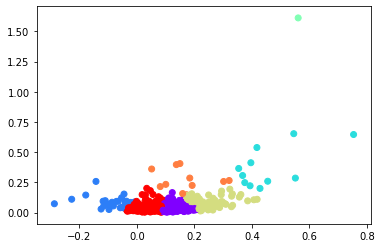

In [27]:
plt.scatter(data['avg_yearly_returns'],data['yearly_variance'], c=labels, cmap='rainbow')

In [254]:
"""
Creating data frame with cluster every point blong and how many stocks are in this clusters.
"""
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)
cluster_perf_df

,cluster,avg_yearly_returns,yearly_variance,Name
0,3,-0.101551,0.091948,21
1,4,0.035269,0.042768,155
2,0,0.130872,0.037805,228
3,6,0.168011,0.267742,11
4,5,0.248409,0.081428,72
5,1,0.457745,0.375688,11
6,2,0.560625,1.611375,1


From the dataframe above, we can see that the distribution of the stocks amongst the clusters is very skewed. Most of the stocks are aggregated in cluster 0 and clsuter 4. For the other clusters, we can see that the avg_yearly_returns and variance are huge. A savvy investor would definitely not invest in these other clusters as the swing is too big. As such, he/she would most probably invest in a stock in cluster 0 and cluster 4. As cluster 0 still contains too many stocks to choose from, I will attempt to conduct another K-Means clustering on cluster 0.

### Create New DataFrame

In [255]:
# creating a dataframe that only consists of cluster `0`
data_sub = data.query("cluster == 0").reset_index(drop=True)

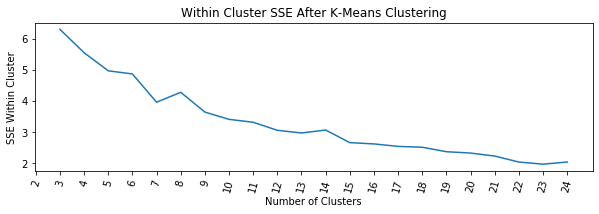

In [256]:
plot_cluster(data_sub, max_loop=25)

In [257]:
second_trial,labels = apply_cluster(data_sub, clusters=7)

clustering performance
-----------------------------------
sse withing cluster: 4.0


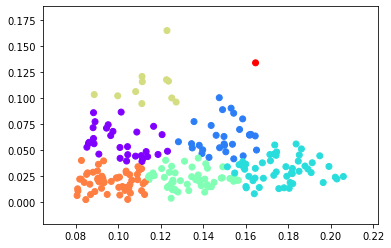

In [258]:
plt.scatter(data_sub['avg_yearly_returns'],data_sub['yearly_variance'], c=labels, cmap='rainbow')

In [259]:
sub_cluster_perf_df = (
    second_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)

sub_cluster_perf_df

,cluster,avg_yearly_returns,yearly_variance,Name
0,5,0.096766,0.019343,55
1,0,0.101508,0.057271,30
2,4,0.113758,0.112473,11
3,3,0.132974,0.021884,52
4,1,0.149352,0.062399,29
5,6,0.164546,0.133855,1
6,2,0.176193,0.030381,50


From the dataframe above, we can see that cluster 3 and cluster 2 would be the 2 better clusters to invest, amongst the rest. Cluster 2 yields a decent return of 17.6% with a 3% variance, while cluster 3 yields  return of 13.8%, with a correspondingly low variance of 2.1% from cluster 2. I decided to add in Sharpe Ratio as a metric to better evaluate the cluster performance.

### What is Sharpe Ratio?

Sharpe Ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. It is derived using annual returns, variance and risk-free rate. A Sharpe Ratio of more than 1 is considered good while a Sharpe Ratio of more than 2 is considered very good.

#### How to compute Sharpe Ratio?
Sharpe Ratio can be computed as such:

$Sharpe\ Ratio = (R_s - R_f) /{SD_s}$

I will be using the first day of the year, 5-years daily U.S. yield rates, from https://home.treasury.gov/ as the risk-free rate.

In [261]:
"""
This part of code is taken from sharp ratio.
"""

us_yield_curve_5years_dict = {"year": [ 2013, 2014, 2015, 2016, 2017, 2018],
                         "risk_free_rate": [ 0.76, 1.72, 1.61, 1.73, 1.94, 2.25]}
us_yield_curve_5years_df = pd.DataFrame.from_dict(us_yield_curve_5years_dict)

avg_risk_free_rate = (
    us_yield_curve_5years_df
    .mean()
    [['risk_free_rate']]
    [0]
)

In [262]:
def get_sharpe_ratio_df(df):
    """
    Computing Sharpe Ratio
    """
    df_w_sharpe_ratio = (
        df
        .pipe(lambda x: x.assign(avg_risk_free_rate=avg_risk_free_rate/100))
        .pipe(lambda x: x.assign(std_dev=np.sqrt(x['yearly_variance'])))
        .pipe(lambda x: x.assign(sharpe_ratio=(x.avg_yearly_returns-x.avg_risk_free_rate)/x.std_dev))
    )

    return df_w_sharpe_ratio

In [263]:
second_trial_w_sharpe_ratio = get_sharpe_ratio_df(second_trial)

In [264]:
def get_transform_df(df_w_sharpe_ratio):
    """
    Transforming dataframe so that we can plot a boxplot of `Returns`, `Variance` and `Sharpe Ratio` for each cluster
    """
    df_yearly_returns = (
        df_w_sharpe_ratio
        [['avg_yearly_returns', 'cluster']]
        .pipe(lambda x: x.assign(type='avg_yearly_returns'))
        .rename(columns={"avg_yearly_returns": "rate"})
    )

    df_variance = (
        df_w_sharpe_ratio
        [['yearly_variance', 'cluster']]
        .pipe(lambda x: x.assign(type='yearly_variance'))
        .rename(columns={"yearly_variance": "rate"})
    )

    df_sharpe_ratio = (
        df_w_sharpe_ratio
        [['sharpe_ratio', 'cluster']]
    )

    df_transform = pd.concat([df_yearly_returns, df_variance], axis=0)

    return df_transform, df_sharpe_ratio

In [265]:
sub_cluster_transform, sub_cluster_sharpe_ratio = get_transform_df(second_trial_w_sharpe_ratio)


In [266]:
def cluster_perf(transform_df, sharpe_ratio_df):
    """
    Plotting boxplot of cluster performance
    """
    _  = plt.figure(figsize=(15,7))

    ax1 = plt.subplot(121)
    _ = sns.boxplot(x='cluster', y='rate', hue='type', data=transform_df)
    _ = plt.title("Distribution of Returns and Variance for each Cluster")

    ax2 = plt.subplot(122)
    _ =sns.boxplot(x='cluster', y='sharpe_ratio', data=sharpe_ratio_df, color='royalblue')
    _ = plt.title("Distribution of Sharpe Ratio for each Cluster")

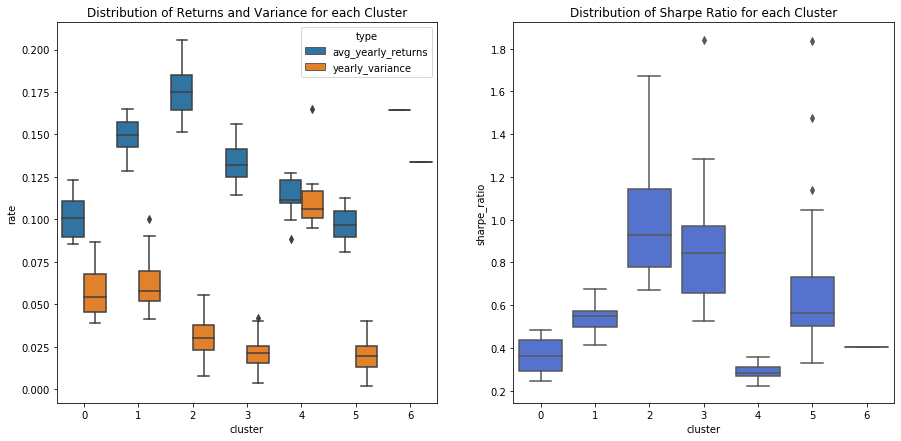

In [267]:
cluster_perf(sub_cluster_transform, sub_cluster_sharpe_ratio)

From the charts above, we can see that cluster 2 has the best Sharpe Ratio distribution amongst the rest and that its average returns (17.8%) and variance (3.0%) is acceptable for my risk appetite. For someone who have a smaller risk appetite, he/she should be looking at cluster 3, where the sharpe ratio is still fairly decent, along with moderate average returns (13.2%) and variance(2%)

 I would like to take segement it even further so that I can have a smaller group of stocks to research on.

In [269]:
(
    second_trial_w_sharpe_ratio
    .groupby("cluster")
    .agg({"avg_yearly_returns": "mean", "yearly_variance": "mean", "sharpe_ratio": "mean", "Name": "count"})
    .reset_index()
)

,cluster,avg_yearly_returns,yearly_variance,sharpe_ratio,Name
0,0,0.101508,0.057271,0.364030,30
1,1,0.149352,0.062399,0.541366,29
2,2,0.176193,0.030381,0.976050,50
3,3,0.132974,0.021884,0.841687,52
4,4,0.113758,0.112473,0.291347,11
5,5,0.096766,0.019343,0.652951,55
6,6,0.164546,0.133855,0.404150,1


In [270]:
# filtering out for cluster 1
best_sub_cluster = second_trial.query("cluster == 2")

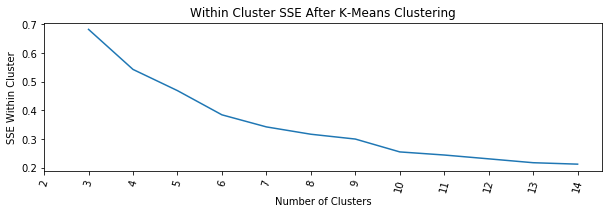

In [271]:
plot_cluster(best_sub_cluster, max_loop=15)

In [278]:
third_trial,labels = apply_cluster(best_sub_cluster, clusters=5)


clustering performance
-----------------------------------
sse withing cluster: 0.0


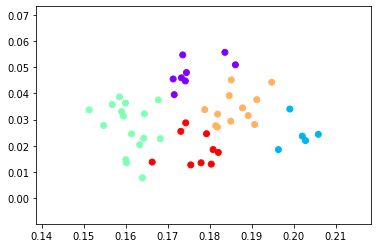

In [279]:
plt.scatter(best_sub_cluster['avg_yearly_returns'],best_sub_cluster['yearly_variance'], c=labels, cmap='rainbow')

In [280]:
best_sub_cluster_perf = (    
    third_trial
    .groupby('cluster')
    .agg({"avg_yearly_returns":"mean", "yearly_variance":"mean", "Name":"count"})
    .sort_values('avg_yearly_returns')
    .reset_index()
)
best_sub_cluster_perf

,cluster,avg_yearly_returns,yearly_variance,Name
0,2,0.160830,0.027050,16
1,0,0.176013,0.048148,8
2,4,0.176625,0.018652,9
3,3,0.186037,0.034212,12
4,1,0.201239,0.024531,5


In [281]:
third_trial_w_sharpe_ratio = get_sharpe_ratio_df(third_trial)

In [282]:
best_sub_cluster_transform, best_sub_cluster_sharpe_ratio = get_transform_df(third_trial_w_sharpe_ratio)


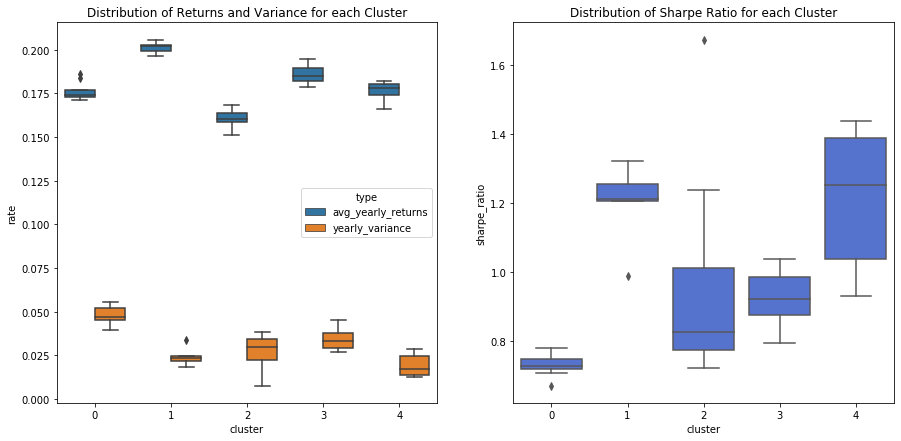

In [283]:
cluster_perf(best_sub_cluster_transform, best_sub_cluster_sharpe_ratio)


We can see that cluster 2 has the best sharpe ratio distribution and a very impressive average returns of 16 % and variance of 2.7% . This golden cluster of 16 stocks definitely captured my attention and I should focused my research on them and create a portfolio based on them.

In [285]:
(
    third_trial_w_sharpe_ratio
    .groupby('cluster')
    .agg({"avg_yearly_returns": "mean", "yearly_variance": "mean", "sharpe_ratio": "mean", "Name": "count"})
    .reset_index()
)

,cluster,avg_yearly_returns,yearly_variance,sharpe_ratio,Name
0,0,0.176013,0.048148,0.728378,8
1,1,0.201239,0.024531,1.195823,5
2,2,0.160830,0.027050,0.936922,16
3,3,0.186037,0.034212,0.924652,12
4,4,0.176625,0.018652,1.212197,9


In [199]:
third_trial.query("cluster == 2").Name.unique()

array(['BLK', 'CFG', 'IQV', 'IT', 'JPM', 'MAS', 'MMC', 'PNC', 'ROP',
       'STI', 'SYK', 'WM', 'ZTS'], dtype=object)

### Analyze complexity of code

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix.

In [28]:
d_means = {'cluster 1': [0, 0], 
           'cluster 2': [4, 5], 
           'cluster 3': [5, 0]}
d_covs = {'cluster 1': [[1, 1], 
                        [1, 4]], 
          'cluster 2': [[1, 1], 
                        [1, 3]], 
          'cluster 3': [[4, 2], 
                        [2, 2]]}

In [29]:
"""
reference: https://h1ros.github.io/posts/make-simulated-data-for-clustering/
"""


def create_clustered_data(d_means, d_covs, n_data=1000):
    """create artificial data for clustering
    
    Parameters
    ----------
    d_means : dict
        a dictionary of cluster means matrix. 
        The key is cluster name and the value.
        Each value will be passed to np.random.multivariate_normal as mean
    d_covs : dict
        a dictionary of cluster covariance matrix. 
        The key is cluster name and the value.
        Each value will be passed to np.random.multivariate_normal as covariance

    Returns
    -------
    pd.DataFrame
    
    """
    # Generate data based on the above parameters
    l = []
    for cluster in d_means.keys():
        random.seed(30)
        arr = np.random.multivariate_normal(d_means[cluster], d_covs[cluster], n_data,)
        df_tmp = pd.DataFrame(arr)
        l.append(df_tmp)
    return pd.concat(l)

#### Time complexity analysis

Creating a function which will be call for test data for clustring

In [30]:
# I have coded this part myself
def Clustring(samples):
    global loopCounter
    loopCounter = 0
    initial_centers = kmeans_plusplus(samples, 5).initialize()
    kmeans_instance = kmeans(samples, initial_centers)
    kmeans_instance.process()

In [64]:
"""
https://electronut.in/plotting-algorithmic-time-complexity-of-a-function-using-python/
"""

import timeit 
from functools import partial
# 

def plotTC(fn, nMin, nMax, nInc, nTests):
    """
    Run timer and plot time complexity
    """
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        data = create_clustered_data(d_means, d_covs, n_data=i)
        testNTimer = timeit.Timer(partial(fn, data))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    plt.xlabel('Size of Data (n)')
    plt.ylabel('run time (secs)')
    plt.title('Run Time Big(O) for K_Mean Clustring')
    plt.plot(x, y, 'o-');


Analyzing Algorithms...


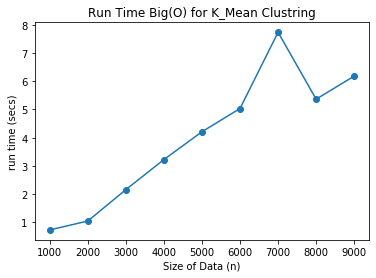

In [65]:
print('Analyzing Algorithms...')
plotTC(Clustring, 1000, 10000, 1000, 10)

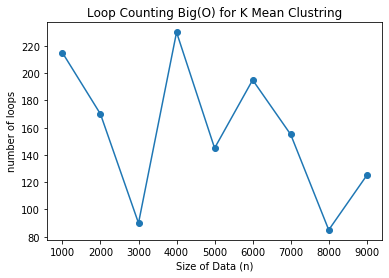

In [31]:
"""
https://runestone.academy/runestone/books/published/StudentCSP/CSPWhileAndForLoops/whileCount.html
and the notebook you give me
"""
#change by me
def countLoops(value):
    testData = create_clustered_data(d_means, d_covs, n_data=value) 
    Clustring(testData) 
    return loopCounter
nvals    = [n for n in range(1000, 10000, 1000)]
loopvals = [countLoops(n)  for n in nvals]
plt.xlabel('Size of Data (n)')
plt.ylabel('number of loops')
plt.title('Loop Counting Big(O) for K Mean Clustring')
plt.plot(nvals, loopvals, 'o-');